# PREAMBLE

#### Some prelimiar configurations are made here, before importing the libraries and starting the code.

### Plot configs

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 4.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

### Functions

In [21]:
from sklearn.preprocessing import StandardScaler   as ss
from sklearn.neighbors     import NearestNeighbors as nn

def psm (reference_df, target_df, scaler=True):
    """
    
    :param reference_df: reference dataset, the one you will use as reference to match the second dataset.
    :param target_df:    dataset to be matched.
    :param scaler:       should it be scaled or not? how?
    :return: 
    """
    
    reference = reference_df.values
    target    = target_df.values
    
    if scaler==True:
        scaler = ss()
    else:
        scaler.fit(reference)
        reference = scaler.transform(reference)
        target = scaler.transform(target)
    
    neighbors = nn(n_neighbors=1, algorithm='ball_tree').fit(target)
    distances, indices = neighbors.kneighbors(reference)
    indices = indices.reshape(indices.shape[0])
    matched = target.ix[indices]
    return (matched)

# Libraries

In [2]:
import numpy                as np
import pandas               as pd
import matplotlib.pyplot as plt
import seaborn              as sns
import os

In [3]:
# import pymatch              as pm
# from pymatch.Matcher        import Matcher

In [4]:
data_path = '../../Catalogue/Match07_smalldoubleclean_emlines.csv'

In [5]:
dataset = pd.read_csv(data_path)

In [6]:
uv_redseq_all = dataset[dataset['UV_CLASS_YI2011']!='RSF']

In [7]:
uv_redseq_retpassive = uv_redseq_all[uv_redseq_all['WHAN_CLASS']=='Retired/Passive']

In [8]:
uv_upturn = uv_redseq_retpassive[uv_redseq_retpassive['UV_CLASS_YI2011']=='UV_UPTURN']

In [9]:
uv_weak = uv_redseq_retpassive[uv_redseq_retpassive['UV_CLASS_YI2011']=='UV_WEAK']

# Let's check a few parameters before PSM

In [10]:
for i in uv_redseq_all.keys():
    print(i)

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

In [11]:
palette = ['#dfc27d', '#a6611a']

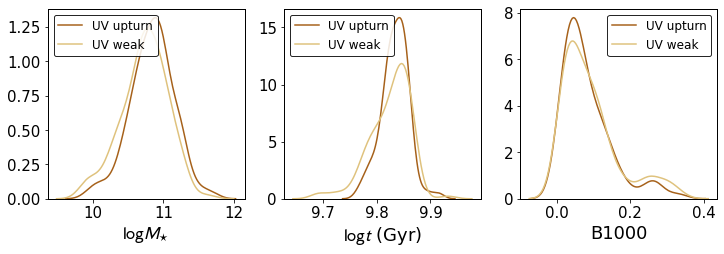

In [12]:
plt.rcParams.update(plotpars_3cols)
plt.subplot(1, 3, 1)
sns.kdeplot(uv_upturn['logmstar'], color=palette[1], label='UV upturn')
sns.kdeplot(uv_weak['logmstar'], color=palette[0], label='UV weak')
plt.legend(loc='upper left')
plt.xlabel(r"$\log M_{\star}$")

plt.subplot(1, 3, 2)
sns.kdeplot(uv_upturn['logage'], color=palette[1], label='UV upturn')
sns.kdeplot(uv_weak['logage'], color=palette[0], label='UV weak')
plt.legend(loc='upper left')
plt.xlabel(r"$\log t}$ (Gyr)")

plt.subplot(1, 3, 3)
sns.kdeplot(uv_upturn['B1000'], color=palette[1], label='UV upturn')
sns.kdeplot(uv_weak['B1000'], color=palette[0], label='UV weak')
plt.legend(loc='upper right')
plt.xlabel(r"B1000")

plt.show()

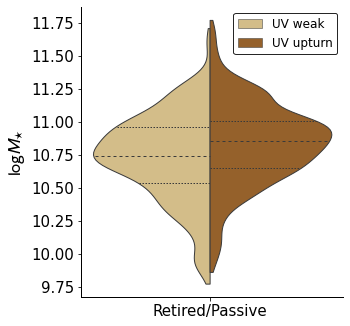

In [13]:
plt.rcParams.update(plotpars_3cols)
vplot1 = sns.catplot(x='WHAN_CLASS', y='logmstar', hue='UV_CLASS_YI2011', data=uv_redseq_retpassive, 
                     split=True, kind='violin', inner="quart", 
                     palette={"UV_UPTURN": palette[1], "UV_WEAK": palette[0]}, bw=.3, cut=1, linewidth=1., 
                     x_order=['UV_UPTURN','UV_WEAK'], legend_out=False, figsize=(20,4))
leg = vplot1.axes.flat[0].get_legend()
leg.set_title(None)
new_labels = ['UV weak', 'UV upturn']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.ylabel(r"$\log M_{\star}$")
plt.xlabel(r"")

plt.show()

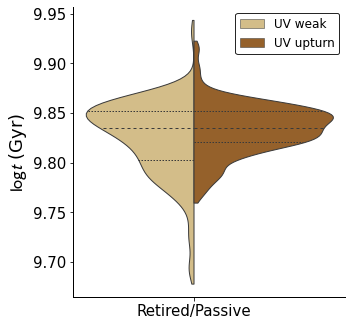

In [14]:
plt.rcParams.update(plotpars_3cols)
vplot1 = sns.catplot(x='WHAN_CLASS', y='logage', hue='UV_CLASS_YI2011', data=uv_redseq_retpassive, 
                     split=True, kind='violin', inner="quart", 
                     palette={"UV_UPTURN": palette[1], "UV_WEAK": palette[0]}, bw=.3, cut=1, linewidth=1., 
                     x_order=['UV_UPTURN','UV_WEAK'], legend_out=False, figsize=(20,4))
leg = vplot1.axes.flat[0].get_legend()
leg.set_title(None)
new_labels = ['UV weak', 'UV upturn']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.ylabel(r"$\log t$ (Gyr)")
plt.xlabel(r"")

plt.show()

## Creating sub dataframes only with the parameters to be matched (i.e. mass, redshift)

In [28]:
reference = uv_upturn.filter(items=['Z', 'logmstar'], axis=1)

In [29]:
target = uv_weak.filter(items=['Z', 'logmstar'], axis=1)

## Running PSM

In [ ]:
psm = psm(target_df=)